In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


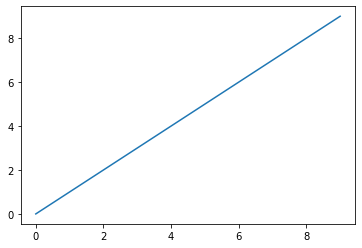

In [2]:
plot(range(10))

In [3]:
# Fixing plots
rcParams['image.cmap'] = 'viridis'
rcParams['axes.labelsize'] = 9
rcParams['xtick.labelsize'] = 9
rcParams['ytick.labelsize'] = 9
rcParams['legend.fontsize'] = 9
rcParams['figure.dpi'] = 160
rcParams['savefig.dpi'] = 200

In [4]:
#from sklearn.externals # import joblib
#import joblib

In [12]:
import sklearn
import seaborn
import joblib
from scipy.fftpack import dct, idct

In [6]:
som = joblib.load('/home/jupyter/SOM_compat.pkl')

In [8]:
data = np.load('/home/jupyter/Full_DataDCT.npy')

In [10]:
reduced_data = np.load('/home/jupyter/Full_reducedData.npy')

In [7]:
som.bmus

array([[196, 571],
       [457, 427],
       [ 99, 902],
       ...,
       [764, 128],
       [809, 305],
       [139, 862]], dtype=int32)

In [9]:
data

array([[-2.66327882e+00, -1.16890728e+00,  2.08787775e+00, ...,
         2.04562512e-03,  3.03737400e-03, -8.95232894e-03],
       [-7.83656985e-02,  9.06474665e-02,  1.09213257e+00, ...,
         1.04788123e-02,  9.65956307e-04, -2.72308663e-03],
       [ 1.84641969e+00, -2.32773342e+01,  5.62429123e+01, ...,
        -1.04560349e-02, -4.98314807e-03,  2.81414837e-02],
       ...,
       [ 1.73111439e+01, -3.13103724e+00, -1.42813501e+01, ...,
         5.14581390e-02,  3.30513194e-02,  1.65477151e-03],
       [ 2.05323577e+00,  1.32392240e+00, -6.09348249e+00, ...,
         1.28170885e-02,  1.69780049e-02, -6.15456328e-03],
       [-8.42369175e+00, -1.08604488e+01,  1.46172991e+01, ...,
         4.32779267e-03,  9.43744648e-03, -9.58213955e-03]], dtype=float32)

In [13]:
#a = data[3303,:].reshape(200,200)
#a = np.reshape(test.read().ravel(),(200,200))
def dct2(block):
    return dct(dct(block.T, norm='ortho').T, norm='ortho')

def idct2(block):
    return idct(idct(block.T, norm='ortho').T, norm='ortho')
#c = dct2(a)

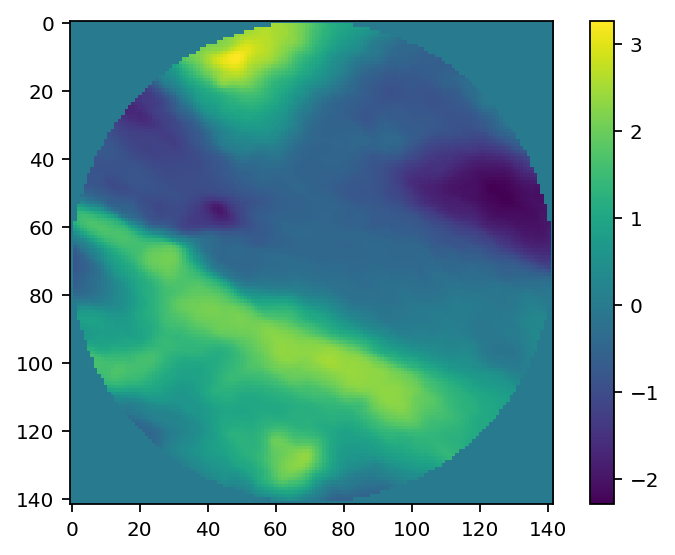

In [11]:
imshow(reduced_data[12132].reshape(142,142))
colorbar()

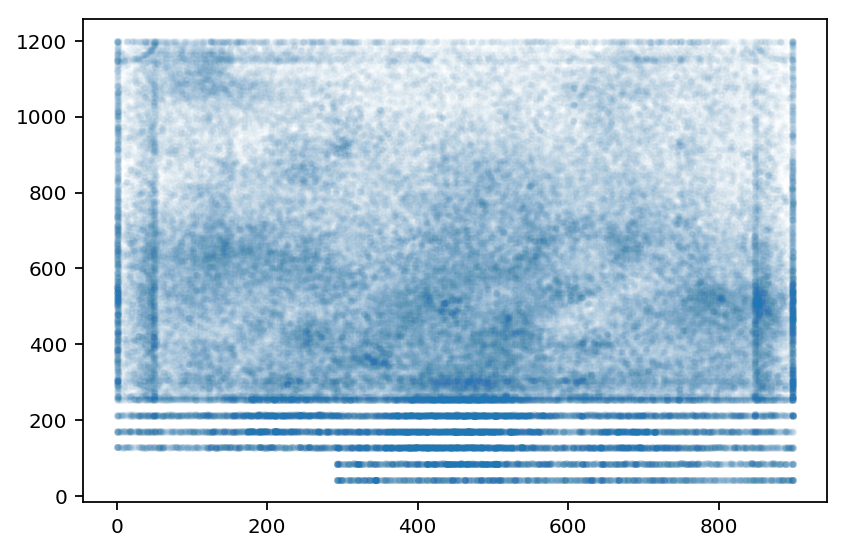

In [35]:
scatter(som.bmus[:,0],som.bmus[:,1],marker='.',alpha=0.02,linewidths=0.0)

In [9]:
som.view_similarity_matrix()

MemoryError: 

In [14]:
np.shape(data[13])

(5041,)

In [ ]:
som.cluster()

In [19]:
from sklearn import neighbors as nn

In [20]:
tq  = nn.BallTree(som.bmus,metric='cityblock')

In [33]:
som.bmus[3303]

array([  1, 727], dtype=int32)

In [29]:
tq.query(som.bmus[3303].reshape(1,-1),10)

(array([[ 0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.]]),
 array([[  3303,   8260,  80222,  12132, 114211,  40963, 145299, 205465,
          98566,  20481]]))

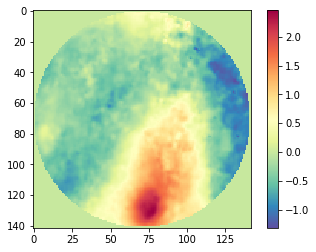

In [27]:
imshow(reduced_data[40963].reshape(142,142))
colorbar()

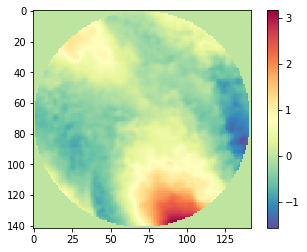

In [26]:
imshow(reduced_data[80222].reshape(142,142))
colorbar()

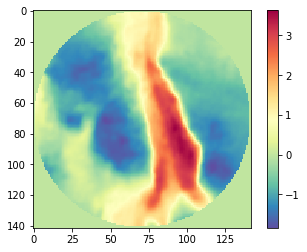

In [25]:
imshow(reduced_data[8260].reshape(142,142))
colorbar()

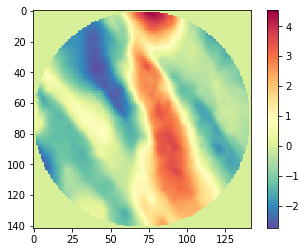

In [18]:
imshow(reduced_data[3303].reshape(142,142))
colorbar()

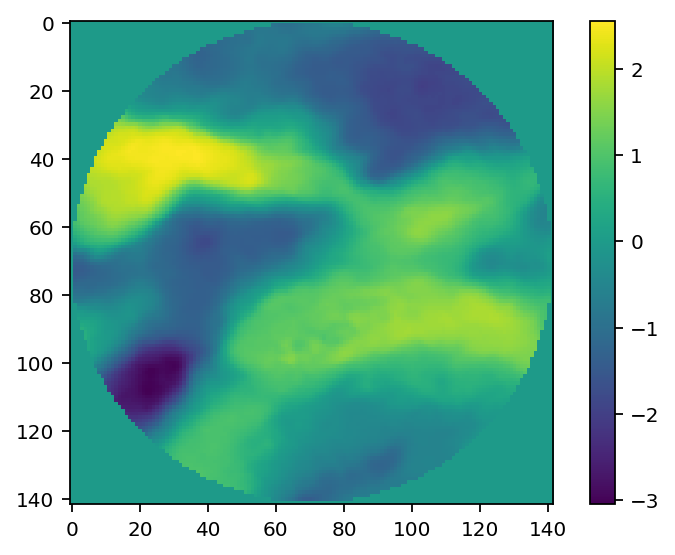

In [42]:
imshow(reduced_data[13,:].reshape(142,142))
colorbar()

In [44]:
tq.query(som.bmus[13].reshape(1,-1),10),som.bmus[13]

((array([[ 0.,  2.,  4.,  4.,  5.,  5.,  5.,  6.,  7.,  8.]]),
  array([[    13, 141911, 135030, 149889, 136487, 133815,  89372,  18546,
          149846, 103994]])),
 array([ 23, 797], dtype=int32))

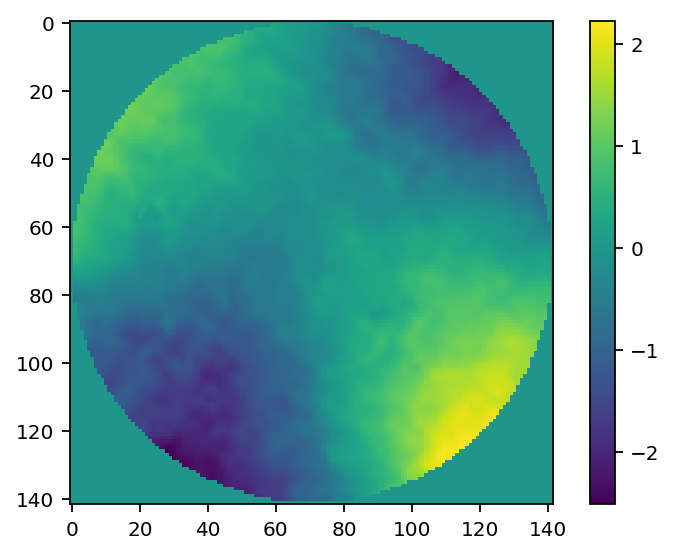

In [47]:
imshow(reduced_data[149889,:].reshape(142,142))
colorbar()

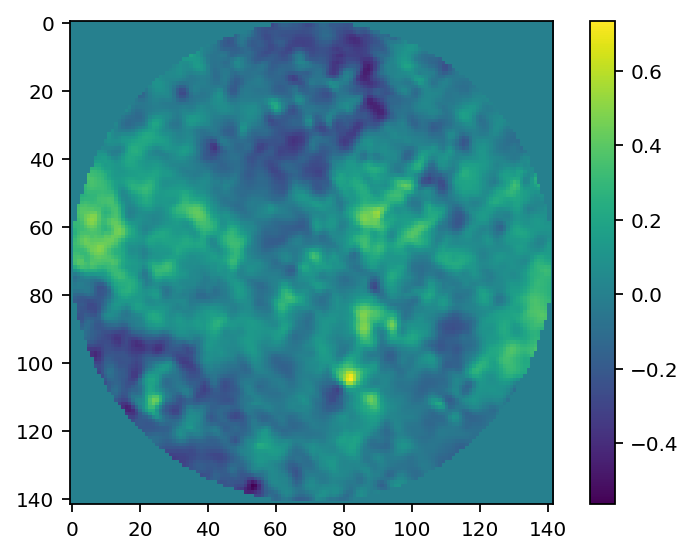

In [37]:
imshow(reduced_data[8284,:].reshape(142,142))
colorbar()

In [38]:
tq.query(som.bmus[8284].reshape(1,-1),10)

(array([[ 0.,  2.,  2.,  2.,  3.,  3.,  4.,  4.,  4.,  4.]]),
 array([[  8284,   7491,  35420, 186346,  99407,  17176,  63656,  42926,
         131257,  94322]]))

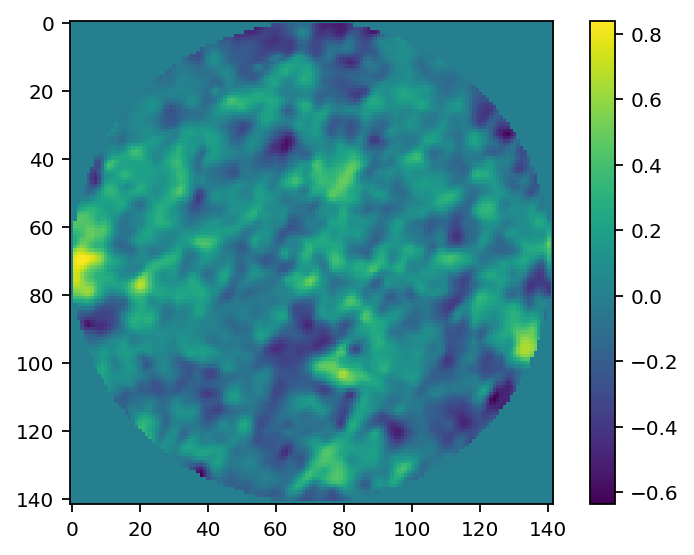

In [41]:
imshow(reduced_data[131257,:].reshape(142,142))
colorbar()

In [6]:
import numpy as np
import somoclu
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
somoclu.Somoclu()

In [4]:
# Make testing data
c1 = np.random.rand(50, 3)/5
c2 = (0.6, 0.1, 0.05) + np.random.rand(50, 3)/5
c3 = (0.4, 0.1, 0.7) + np.random.rand(50, 3)/5
data = np.float32(np.concatenate((c1, c2, c3)))
colors = ["red"] * 50
colors.extend(["green"] * 50)
colors.extend(["blue"] * 50)
n_rows, n_columns = 100, 160

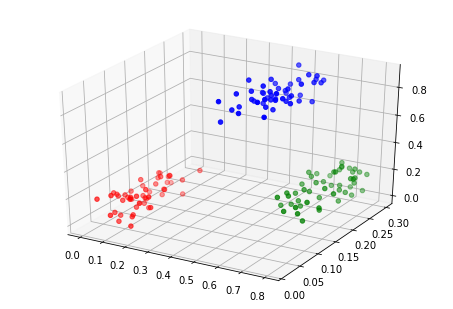

In [5]:
# Plot the testing data
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=colors)
labels = range(150)

In [6]:
# Run SOM
som = somoclu.Somoclu(n_columns, n_rows, data=data, compactsupport=False, verbose=2)
som.train()

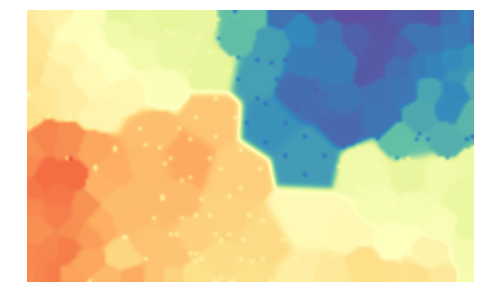

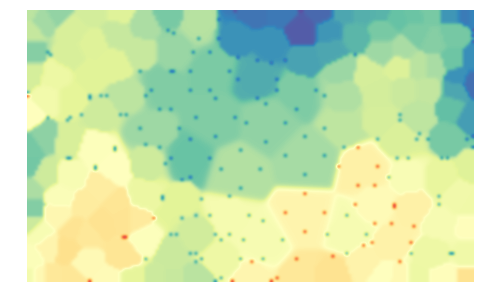

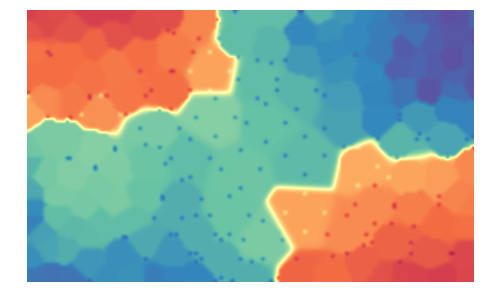

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.5/site-packages/matplotlib/pyplot.py'>

In [7]:
som.view_component_planes()

In [30]:
import numpy as np
import pandas as pd
import somoclu
from tqdm import tqdm
import os, sys
from scipy.fftpack import dct, idct
import scipy as sp
from sklearn import decomposition as decomp

In [9]:
data = np.load('/home/jupyter/data_all_tiles.npy')

In [10]:
np.shape(data)

(212534, 40000)

In [14]:
%time dct2(a)

CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 1.64 ms


array([[  1.09677566e-02,   6.47954712e+01,  -5.93885994e+01, ...,
         -4.09622211e-03,  -1.78833015e-03,   7.41577183e-04],
       [ -4.93507141e+02,   5.10074997e+00,  -3.92081871e+01, ...,
          3.03649897e-04,   5.90515148e-04,  -1.18387220e-02],
       [  1.01680679e+02,   1.55523071e+01,  -5.55836964e+00, ...,
         -8.23974624e-05,  -7.22560892e-03,   5.57403592e-03],
       ..., 
       [ -1.42676467e-02,  -6.33305777e-03,   1.98057778e-02, ...,
         -5.06806001e-03,   3.66434315e-03,  -1.24512089e-03],
       [ -1.84137840e-02,   1.78737789e-02,   6.84904819e-03, ...,
         -1.03918579e-03,  -1.00022880e-02,   7.04148435e-04],
       [  1.59433521e-02,  -6.70301495e-03,  -1.95543952e-02, ...,
          1.95544655e-03,   3.54829966e-03,  -7.91987404e-04]], dtype=float32)

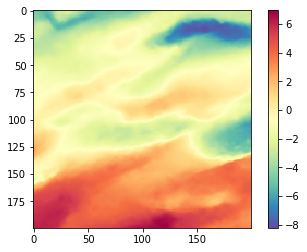

In [15]:
# Full resolution
imshow(a)
colorbar()

In [22]:
TL = ~kernel2
TL[71:] = 0
TL[:,71:] = 0

TR = ~kernel2
TR[71:] = 0
TR[:,:71] = 0

In [26]:
tiles = len(data)

In [ ]:
X, Y = np.meshgrid(r_[-49.75:50:.5],r_[-49.75:50:.5])

xCoords = X[kernel]
yCoords = Y[kernel]

pca = decomp.PCA()

gross_slope = np.zeros((tiles))

dataDCT = np.ones((tiles,5041),dtype=numpy.float32) # Reduced dimentionality!!!

reduced_data = np.ones((tiles,20164),dtype=numpy.float32)

for i in tqdm(range(tiles)):
    tile_ = data[i,:].reshape((200,200))
    orgin = np.vstack((X.ravel(),Y.ravel(),tile_.ravel()))
    zCoords = tile_[kernel]
    stacked = np.vstack((xCoords,yCoords,zCoords))
    
    pca.fit(stacked.T)
    # Sanity check to make sure third componet is always slope??
    gross_slope[i] = numpy.degrees(numpy.arccos(np.dot(np.abs(pca.components_[2]),
                                                       np.array([0,0,1]))))
    
    XY, Values = np.dot(orgin.T,pca.components_.T)[:,:2], np.dot(orgin.T,pca.components_.T)[:,2]
    
    normed = sp.interpolate.griddata(XY,Values,orgin.T[:,:2],'linear')
    
    reduced = normed.reshape(200,200)[29:-29,29:-29]

    
    if np.isnan(reduced).any():
        nanmask = np.isnan(reduced)
        filler = sp.interpolate.griddata(XY,Values,orgin.T[:,:2],'nearest')
        fill = filler.reshape(200,200)[29:-29,29:-29]
        reduced[nanmask] = fill[nanmask]
    
    
    
    circ = np.zeros((142,142))
    circ[kernel2] = reduced[kernel2]
    
    transformed = dct2(circ)
    #transformed = dct2(reduced)
    
    trans_duced = transformed[:71,:71]
    
    dataDCT[i,:5041] = trans_duced.ravel()
    
    # For comparision / sanity checking
    reduced_data[i,:] = circ.ravel() #reduced.ravel() # circ.ravel()
    
    if np.isnan(circ).any():
        #imshow(reduced_data[i].reshape(142,142))
        print(i)
    
    # Need to test for flips!!!

  1%|          | 1169/212534 [08:32<25:44:36,  2.28it/s]